# Test plot model DAGs

In [1]:
%matplotlib inline
import numpy as np
import networkx as nx
import logging
logger = logging.getLogger()
logger.setLevel(logging.INFO)
from tramp.models.dag_model import Layout
from tramp.models import FactorPGM
from tramp.models import GeneralizedLinearModel, MultiLayerModel
from tramp.priors import GaussianPrior, GaussBernouilliPrior, BinaryPrior
from tramp.likelihoods import GaussianLikelihood, SngLikelihood, AbsLikelihood
from tramp.channels import GaussianChannel, AbsChannel, SngChannel, LinearChannel, RotationChannel
from tramp.channels import ConcatChannel, DuplicateChannel

## DAG with DuplicateChannel

In [2]:
from scipy.stats import special_ortho_group
R5 = special_ortho_group.rvs(5)

factor_dag = nx.DiGraph()

a = GaussianPrior(size=2)
b = LinearChannel(np.random.randn(3,2))
c = DuplicateChannel()

d1 = AbsChannel()
e1 = GaussianLikelihood(y=np.zeros(3))

d2 = SngChannel()

factor_dag.add_node(a, size=2)
factor_dag.add_edge(a, b)
factor_dag.add_edge(b, c)

factor_dag.add_edge(c, d1)
factor_dag.add_edge(c, d2)

factor_dag.add_edge(d1, e1)

In [3]:
model = FactorPGM(factor_dag)
model

DAGModel(n_factors=6, n_variables=6)

In [4]:
for d in model.sample():
    print(f"X_{d['variable'].id} size={d['variable'].size} X={d['X']}")

X_0 size=2 X=[-1.34756813 -1.2013003 ]
X_1 size=3 X=[ 1.48644376  0.69696225  2.75165624]
X_2 size=3 X=[ 1.48644376  0.69696225  2.75165624]
X_4 size=3 X=[ 1.48644376  0.69696225  2.75165624]
X_3 size=3 X=[ 1.48644376  0.69696225  2.75165624]
X_5 size=3 X=[ 1.  1.  1.]


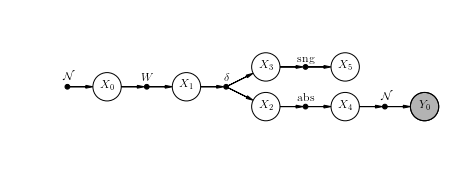

In [5]:
model.daft()

## DAG with ConcatChannel and DuplicateChannel

In [6]:
factor_dag = nx.DiGraph()

a1 = GaussianPrior(size=2)
b1 = LinearChannel(np.random.randn(3,2))

a2 = BinaryPrior(size=5)
b2 = RotationChannel(R5)
c2 = GaussianChannel()

d = ConcatChannel(N1=3, N2=5)
e = AbsChannel()
f = GaussianChannel()

g = DuplicateChannel()

h1 = GaussianLikelihood(y=np.zeros(8))
h2 = SngLikelihood(y=np.zeros(8))

factor_dag.add_node(a1, size=2)
factor_dag.add_edge(a1, b1)

factor_dag.add_node(a2, size=5)
factor_dag.add_edge(a2, b2)
factor_dag.add_edge(b2, c2)

factor_dag.add_edge(b1, d)
factor_dag.add_edge(c2, d)

factor_dag.add_edge(d, e)
factor_dag.add_edge(e, f)
factor_dag.add_edge(f, g)

factor_dag.add_edge(g, h1)
factor_dag.add_edge(g, h2)

In [7]:
model = FactorPGM(factor_dag)
model

DAGModel(n_factors=11, n_variables=10)

In [8]:
for d in model.sample():
    print(f"X_{d['variable'].id} size={d['variable'].size} X={d['X']}")

X_0 size=5 X=[-1  1 -1 -1 -1]
X_1 size=5 X=[  6.27279753e-01   1.52432619e+00   9.73151530e-02  -1.50780581e+00
   1.07710127e-03]
X_2 size=5 X=[-0.26514824  0.61743673 -0.72141328  0.01301504  0.48266581]
X_3 size=2 X=[-0.19311242  1.30310341]
X_4 size=3 X=[ 0.57809027  0.10642195 -2.11287451]
X_5 size=8 X=[ 0.57809027  0.10642195 -2.11287451 -0.26514824  0.61743673 -0.72141328
  0.01301504  0.48266581]
X_6 size=8 X=[ 0.57809027  0.10642195  2.11287451  0.26514824  0.61743673  0.72141328
  0.01301504  0.48266581]
X_7 size=8 X=[ 1.44532985 -0.61463748  2.98542445 -0.25959518  0.70867547  1.23332342
  0.23634816  1.52991684]
X_8 size=8 X=[ 1.44532985 -0.61463748  2.98542445 -0.25959518  0.70867547  1.23332342
  0.23634816  1.52991684]
X_9 size=8 X=[ 1.44532985 -0.61463748  2.98542445 -0.25959518  0.70867547  1.23332342
  0.23634816  1.52991684]


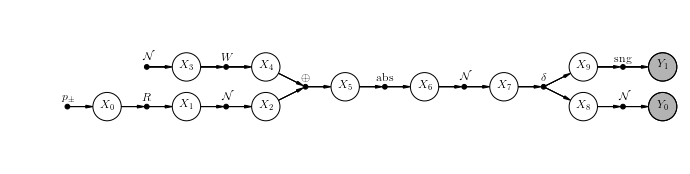

In [9]:
model.daft()